# Data Workflow

If you open the `butane_result.txt` file in a text editor you will see nineteen lines of data, one line for ezch file. 

Within the file name is the torsion angle. The step number for the last energy calculation, NSERCH, is next. The energy follows that and the value is in units of Hartrees/molecule. We will want to convert that to kJ/mole. Then we have the energy gradient for the last structure of the optimization. It should be less than 0.0001 for the claulation to stop. We could have set this lower or higher. The last value recorded in each line is the RMS deviation for the gradient calculation.

**butane_result.txt**
```
butane_SCAN.inp_000_303.log: NSERCH:  23  E=     -156.4228465418  GRAD. MAX=  0.0000585  R.M.S.=  0.0000204
butane_SCAN.inp_010_304.log: NSERCH:  18  E=     -156.4233726910  GRAD. MAX=  0.0000931  R.M.S.=  0.0000255
butane_SCAN.inp_020_305.log: NSERCH:  16  E=     -156.4247889225  GRAD. MAX=  0.0000789  R.M.S.=  0.0000273
butane_SCAN.inp_030_306.log: NSERCH:  16  E=     -156.4267021853  GRAD. MAX=  0.0000394  R.M.S.=  0.0000149
butane_SCAN.inp_040_307.log: NSERCH:  19  E=     -156.4286426893  GRAD. MAX=  0.0000765  R.M.S.=  0.0000260
butane_SCAN.inp_050_308.log: NSERCH:  18  E=     -156.4301847220  GRAD. MAX=  0.0000241  R.M.S.=  0.0000105
butane_SCAN.inp_060_309.log: NSERCH:  23  E=     -156.4310615763  GRAD. MAX=  0.0000675  R.M.S.=  0.0000212
butane_SCAN.inp_070_310.log: NSERCH:  25  E=     -156.4312168483  GRAD. MAX=  0.0000339  R.M.S.=  0.0000129
butane_SCAN.inp_080_311.log: NSERCH:  24  E=     -156.4306888649  GRAD. MAX=  0.0000987  R.M.S.=  0.0000300
butane_SCAN.inp_090_312.log: NSERCH:  26  E=     -156.4295739060  GRAD. MAX=  0.0000494  R.M.S.=  0.0000155
butane_SCAN.inp_100_313.log: NSERCH: 390  E=     -156.4282209688  GRAD. MAX=  0.0000578  R.M.S.=  0.0000160
butane_SCAN.inp_110_314.log: NSERCH:  23  E=     -156.4271414620  GRAD. MAX=  0.0000819  R.M.S.=  0.0000247
butane_SCAN.inp_120_315.log: NSERCH:  24  E=     -156.4267263463  GRAD. MAX=  0.0000884  R.M.S.=  0.0000234
butane_SCAN.inp_130_316.log: NSERCH: 362  E=     -156.4271134870  GRAD. MAX=  0.0000551  R.M.S.=  0.0000145
butane_SCAN.inp_140_317.log: NSERCH:  21  E=     -156.4281850977  GRAD. MAX=  0.0000701  R.M.S.=  0.0000323
butane_SCAN.inp_150_318.log: NSERCH:  21  E=     -156.4296331216  GRAD. MAX=  0.0000712  R.M.S.=  0.0000225
butane_SCAN.inp_160_319.log: NSERCH: 646  E=     -156.4310600533  GRAD. MAX=  0.0000567  R.M.S.=  0.0000254
butane_SCAN.inp_170_320.log: NSERCH:  20  E=     -156.4320918106  GRAD. MAX=  0.0000675  R.M.S.=  0.0000216
butane_SCAN.inp_180_321.log: NSERCH:  23  E=     -156.4324667182  GRAD. MAX=  0.0000605  R.M.S.=  0.0000189
```

Observe that three of the jobs took a longer time to converge. We could open them in MacMolPlt and watch a "movie" of their journey and plot the energies along the way. Where did they get stuck? All three eventually found their way home, but only because this was a light-weight theory level and I was confidient in allowing for a large number of steps. If the level of theory was higher I might hav set the limit to 100 steps, or even 30 steps. All other jobs converged in less than 30 steps.

Why did these three take so long? Bad luck with the exact structure of the input started them on the long path. Tweak a few bond lengths or angles and they might converge just like the others. Clearly, how you start matters. For high levels of theory it is important to start as close to the final answer as possible.

## Import Raw Data
We could edit the data in a text editor but we will do everything using the data analysis tools of Python and pandas. First we will import the data as a dataframe using pandas. The datafile must be in the same directory as this workbook, or you must specify the file path. Don't worry, python will scream at you if you make a mistake and you will be able to fix any problems.

We will use the `pandas.read_csv()` function to read the file and create a dataframe object. The `header = None` setting prevents the first line from being used to label the columns. The `sep = r"\s+|_"` establishes that one or more spaces separates columns and also the `_` character separates columns. The `engine = "python"` means to use the python engine rather than the default cpython engine. The cpython engine is much faster, but it is not compatible with the way I am using the `sep` parameter. How do I know this? I got an error message that told me what to do.

In [1]:
import pandas as pd

df = pd.read_csv("butane_result.txt", header = None, sep = r"\s+|_", engine = "python") 
display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,butane,SCAN.inp,0,303.log:,NSERCH:,23,E=,-156.422847,GRAD.,MAX=,0.000058,R.M.S.=,0.000020
1,butane,SCAN.inp,10,304.log:,NSERCH:,18,E=,-156.423373,GRAD.,MAX=,0.000093,R.M.S.=,0.000025
2,butane,SCAN.inp,20,305.log:,NSERCH:,16,E=,-156.424789,GRAD.,MAX=,0.000079,R.M.S.=,0.000027
3,butane,SCAN.inp,30,306.log:,NSERCH:,16,E=,-156.426702,GRAD.,MAX=,0.000039,R.M.S.=,0.000015
4,butane,SCAN.inp,40,307.log:,NSERCH:,19,E=,-156.428643,GRAD.,MAX=,0.000077,R.M.S.=,0.000026


## Cleaning the Data

Data cleaning is half the work in data analysis. We need to drop empty records and malformed records (each line could be considered a record in this case). We will need to drop any fields (the columns in eacxh record are the fields). Inspecting the dataframe shows me that I only need columns 2,5,7 and 10. We will rename the columns for what they represent. inspect the orginal dataframe above to see where I got my lables from. 

In the code below I create a new dataframe by selecting the four chosen columns out of the previous dataframe. Then I renamed the column headres from numbers to labels so I don't forget what they are.

In [2]:
butane = df[:][[2,5,7,10]]
butane = butane.rename({2:'Torsion', 5:'NSERCH', 7:'Energy', 10:'GRAD'}, axis='columns')
display(butane.head())

,Torsion,NSERCH,Energy,GRAD
0,0,23,-156.422847,0.000058
1,10,18,-156.423373,0.000093
2,20,16,-156.424789,0.000079
3,30,16,-156.426702,0.000039
4,40,19,-156.428643,0.000077


## Processing the Data

We now have a cleaned up data set. We could have done all of this in Excel by importing the text file, setting column breaks manually, deleting unwanted columns manually and then typing in names for the columns. Python and pandas may seem like a bit of work but it is not any more than you would do setting up the data in Excel.

We know that a Hartree is $2625.7\, kJ/mole$. So we can convert the energy to a more familiar unit. Then we should set our lowest energy structure as the zero referemce and substract that value from all the energies to establish a relative scale.

In [3]:
import numpy as np
hartree_conversion = 2625.7

lowest_energy = np.min(butane[:]["Energy"])
butane["DeltaE"] = (butane[:]["Energy"] - lowest_energy) * hartree_conversion
display(butane)

,Torsion,NSERCH,Energy,GRAD,DeltaE
0,0,23,-156.422847,0.000058,25.259697
1,10,18,-156.423373,0.000093,23.878187
2,20,16,-156.424789,0.000079,20.159588
3,30,16,-156.426702,0.000039,15.135934
4,40,19,-156.428643,0.000077,10.040753
5,50,18,-156.430185,0.000024,5.991837
6,60,23,-156.431062,0.000068,3.689481
7,70,25,-156.431217,0.000034,3.281783
8,80,24,-156.430689,0.000099,4.668109
9,90,26,-156.429574,0.000049,7.595657


## Plotting the Profile

Now we have a set of data that we can plot. Let us visualize the profile using the MatPlotLib library.

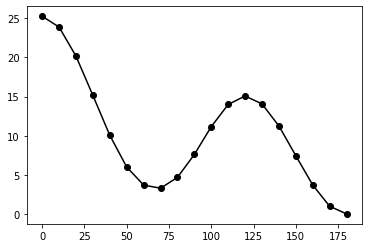

In [4]:
import matplotlib.pyplot as plt

x = butane[:]["Torsion"]
y = butane[:]["DeltaE"]

plt.plot(x,y, "ko-")
plt.show()

## Publication Quality

We can be more stylish. I will use the stylesheet that I editted to my preference. It must be in the local directory.

Divverent journals have different standards for plots. Just follow their instructions. many will hae stylesheets available for your word processor, for $\LaTeX$ and  even for MacMolPlt. use the `savefig()` method of the `fig` object to save the plot as a file. The `.pdf` extension will tell it to save in PDF format. 


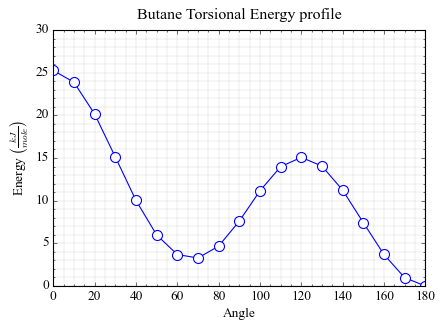

In [5]:
x = butane[:]["Torsion"]
y = butane[:]["DeltaE"]

plt.style.use("S2_classic2.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))  

ax.plot(x,y,"o-")

ax.set(title="Butane Torsional Energy profile",       
          ylabel=r"Energy $\left(\frac{kJ}{mole}\right)$", 
          xlabel="Angle",                
          xlim=[0,180],                  
          ylim=[0,30]
      )                   

#fig.savefig("plot.pdf")
plt.show()

The plot above is a "connect-the-dots" style plot.  There are many data points and it looks fine. We do not have an exact function to which to fit the data but we could apply the infamous "cubic spline." We will use the `CubicSpline` function available from the `scipy.interpolate` library ([Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html)) to generate a function that represents the curve fit.  We will then feed an x-axis of many data points into that function to create a x,y data set that represents that curve fit as a smooth line.

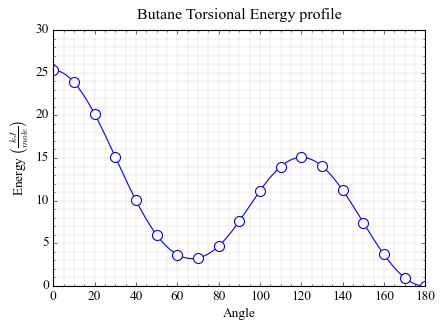

In [6]:
from scipy.interpolate import CubicSpline

plt.style.use("S2_classic2.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))  

cs = CubicSpline(x, y)
x = np.arange(0, 181, 1)
y = cs(x)
ax.plot(x, y, "-")

x = butane[:]["Torsion"]
y = butane[:]["DeltaE"]
ax.plot(x,y,"o")

ax.set(title="Butane Torsional Energy profile",       
          ylabel=r"Energy $\left(\frac{kJ}{mole}\right)$", 
          xlabel="Angle",                
          xlim=[0,180],                  
          ylim=[0,30]
      )                   

#fig.savefig("plot.pdf")
plt.show()

## Saving the Data

We have imported, cleaned and processed the data. maybe we should save our work so we can use this data set directly and easily next time.  The dataframe object contains methods to do this. We will use the 'pandas.DataFrame.to_csv()' method([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)) to save the dataframe object as a csv text file.

In [7]:
butane.to_csv("butane_profile.csv")

The butane energy profile data is now saved in a file named butane_profile.csv. below the file is reporduced in csv format.

**butane_profile.csv**
```
,Torsion,NSERCH,Energy,GRAD,DeltaE
0,0,23,-156.4228465418,5.85e-05,25.2596971734949
1,10,18,-156.423372691,9.31e-05,23.87818721905798
2,20,16,-156.4247889225,7.89e-05,20.15958816950236
3,30,16,-156.4267021853,3.94e-05,15.135934035536433
4,40,19,-156.4286426893,7.65e-05,10.040752682726497
5,50,18,-156.430184722,2.41e-05,5.991837422332486
6,60,23,-156.4310615763,6.75e-05,3.68948108681445
7,70,25,-156.4312168483,3.39e-05,3.281783396412743
8,80,24,-156.4306888649,9.87e-05,4.6681094098429945
9,90,26,-156.429573906,4.94e-05,7.595656993546515
10,100,390,-156.4282209688,5.78e-05,11.148064199614685
11,110,23,-156.427141462,8.19e-05,13.982525204328091
12,120,24,-156.4267263463,8.84e-05,15.072494497839289
13,130,362,-156.427113487,5.51e-05,14.05597916181428
14,140,21,-156.4281850977,7.01e-05,11.242250946837245
15,150,21,-156.4296331216,7.12e-05,7.440174592616324
16,160,646,-156.4310600533,5.67e-05,3.693480027937488
17,170,20,-156.4320918106,6.75e-05,0.9843948852952991
18,180,23,-156.4324667182,6.05e-05,0.0
```